In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
df = pd.read_csv("C:\\Users\\SNEHA\\OneDrive\\Desktop\\Outrix Internship\\Project 3\\WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [9]:
# Basic Exploration
print("\n--- DataFrame Info ---\n")
df.info()
print("\n--- Summary Statistics ---\n")
print(df.describe())
print("\n--- Missing Values ---\n")
print(df.isnull().sum())
print("\n--- Duplicate Records ---\n")
print(df.duplicated().sum())



--- DataFrame Info ---

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        0 non-null      object 
 1   gender            0 non-null      float64
 2   SeniorCitizen     0 non-null      int64  
 3   Partner           0 non-null      float64
 4   Dependents        0 non-null      float64
 5   tenure            0 non-null      int64  
 6   PhoneService      0 non-null      float64
 7   MultipleLines     0 non-null      float64
 8   InternetService   0 non-null      float64
 9   OnlineSecurity    0 non-null      float64
 10  OnlineBackup      0 non-null      float64
 11  DeviceProtection  0 non-null      float64
 12  TechSupport       0 non-null      float64
 13  StreamingTV       0 non-null      float64
 14  StreamingMovies   0 non-null      float64
 15  Contract          0 non-null      float64
 16  PaperlessBilling  0 non-null      fl

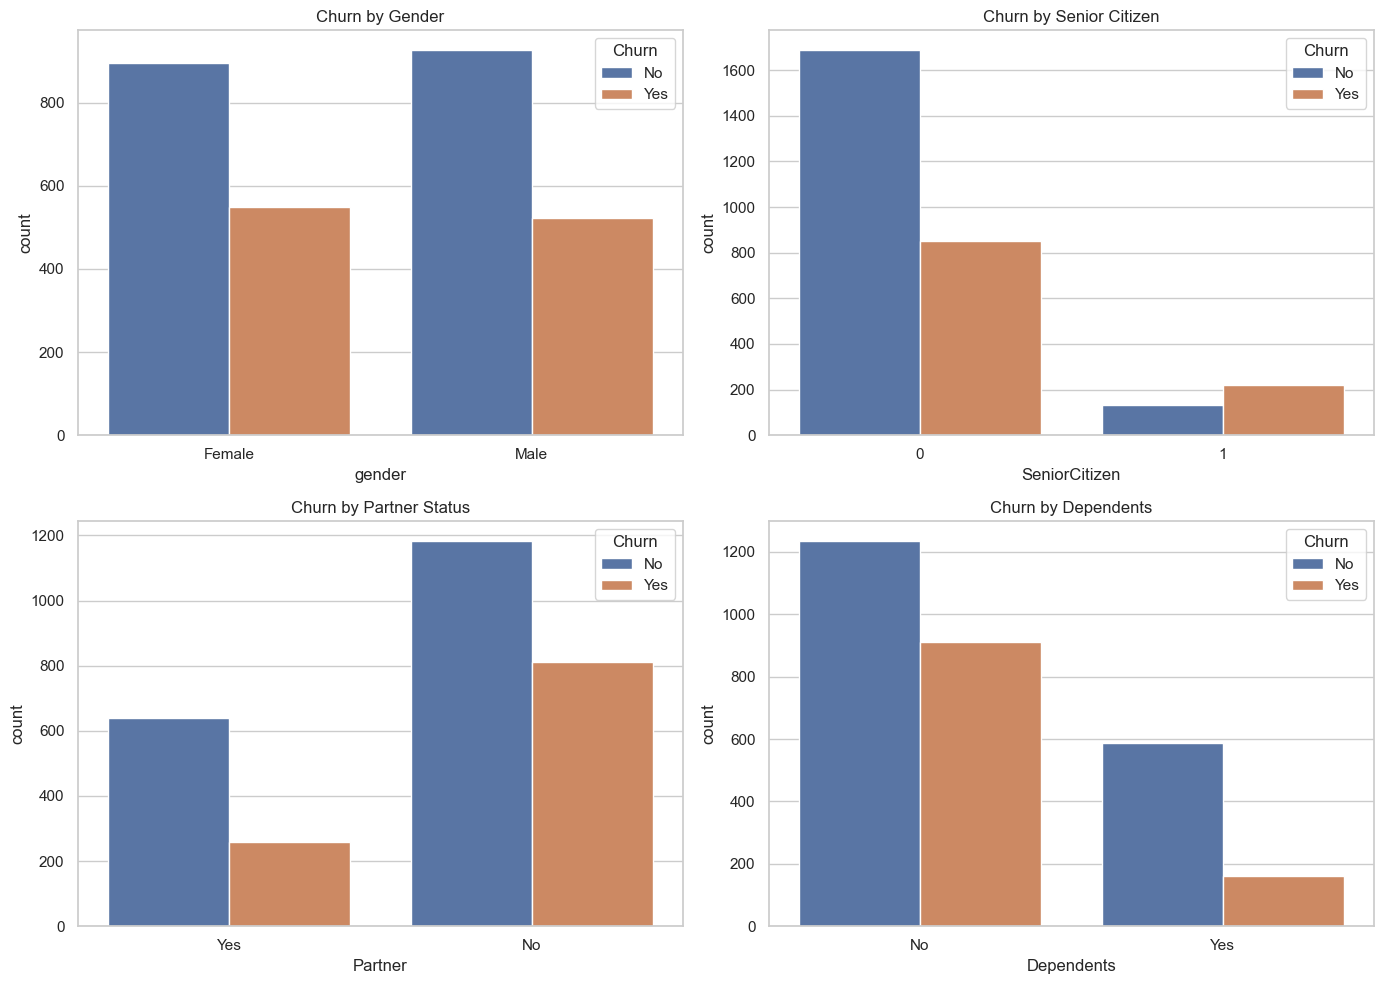

In [13]:
# Set style
sns.set(style="whitegrid")

# Plot: Churn by Gender, SeniorCitizen, Partner, Dependents
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(x='gender', hue='Churn', data=df, ax=axes[0, 0])
axes[0, 0].set_title("Churn by Gender")

sns.countplot(x='SeniorCitizen', hue='Churn', data=df, ax=axes[0, 1])
axes[0, 1].set_title("Churn by Senior Citizen")

sns.countplot(x='Partner', hue='Churn', data=df, ax=axes[1, 0])
axes[1, 0].set_title("Churn by Partner Status")

sns.countplot(x='Dependents', hue='Churn', data=df, ax=axes[1, 1])
axes[1, 1].set_title("Churn by Dependents")

plt.tight_layout()
plt.show()

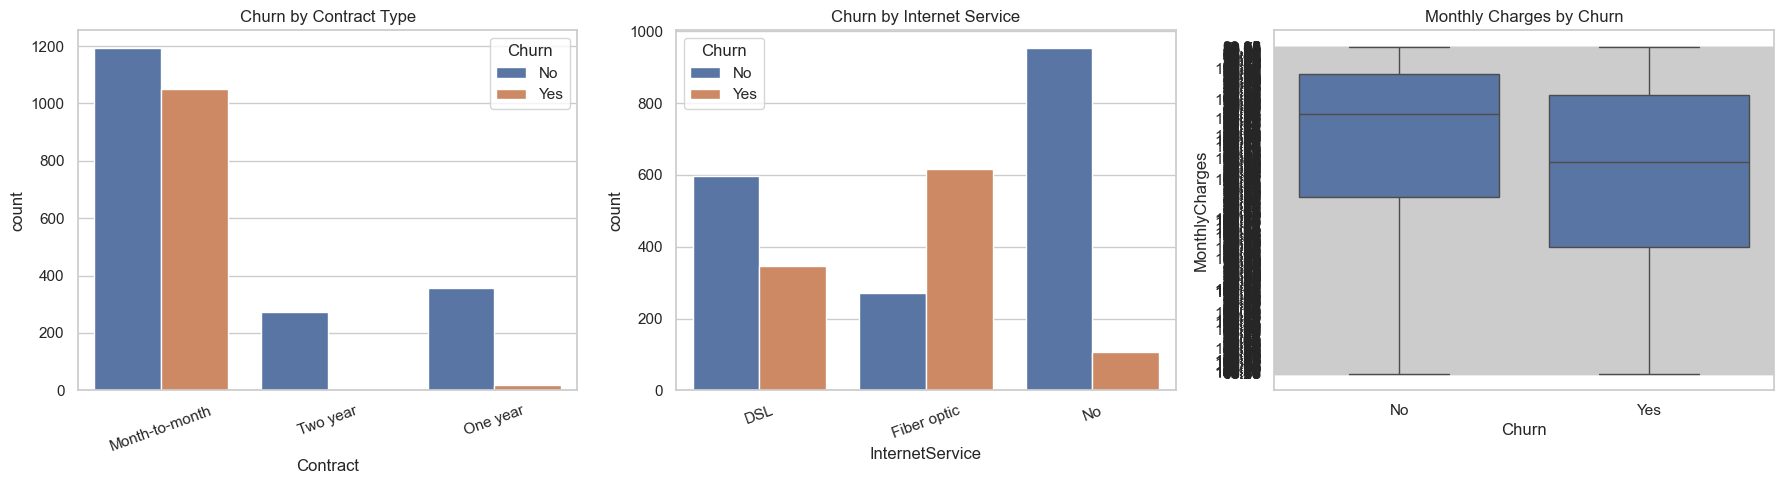

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Churn by Contract Type
sns.countplot(x='Contract', hue='Churn', data=df, ax=axes[0])
axes[0].set_title("Churn by Contract Type")
axes[0].tick_params(axis='x', rotation=20)

# Plot 2: Churn by Internet Service
sns.countplot(x='InternetService', hue='Churn', data=df, ax=axes[1])
axes[1].set_title("Churn by Internet Service")
axes[1].tick_params(axis='x', rotation=20)

# Plot 3: Monthly Charges vs Churn (Boxplot)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[2])
axes[2].set_title("Monthly Charges by Churn")

# Display all plots
plt.tight_layout()
plt.show()

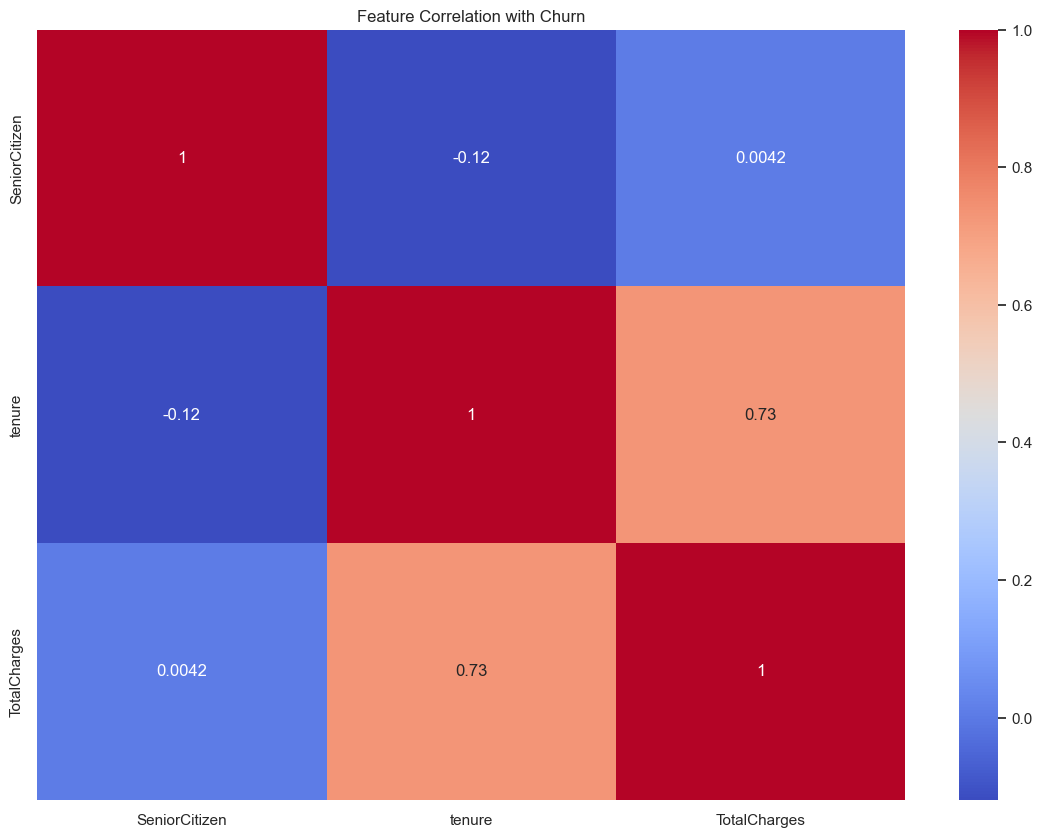

In [21]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Churn")
plt.show()

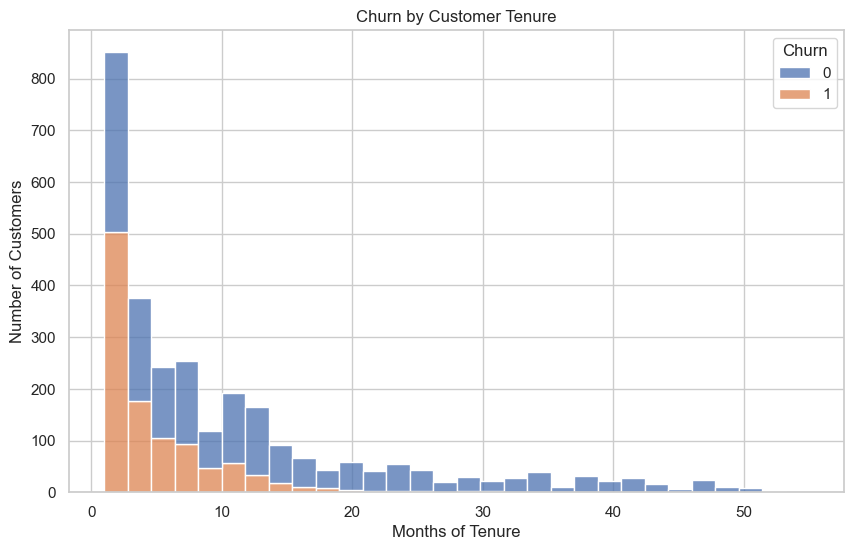

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title("Churn by Customer Tenure")
plt.xlabel("Months of Tenure")
plt.ylabel("Number of Customers")
plt.show()

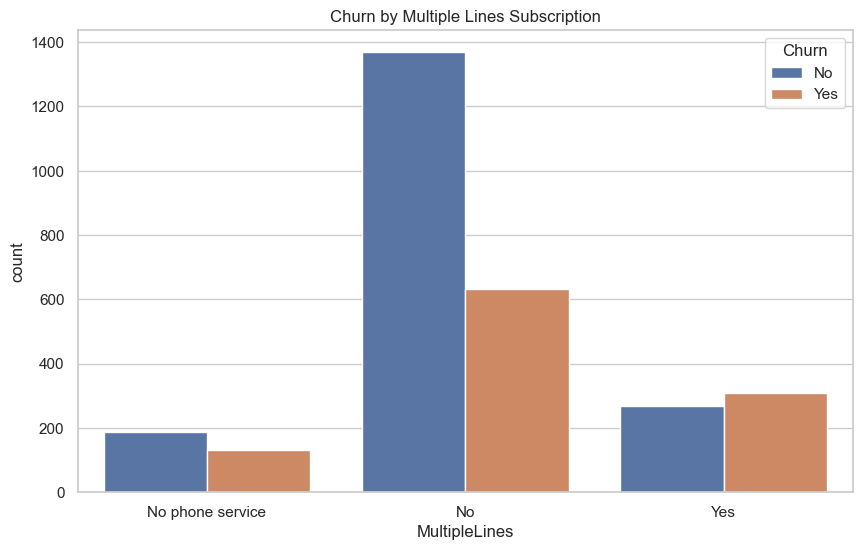

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MultipleLines', hue='Churn', data=df)
plt.title("Churn by Multiple Lines Subscription")
plt.show()

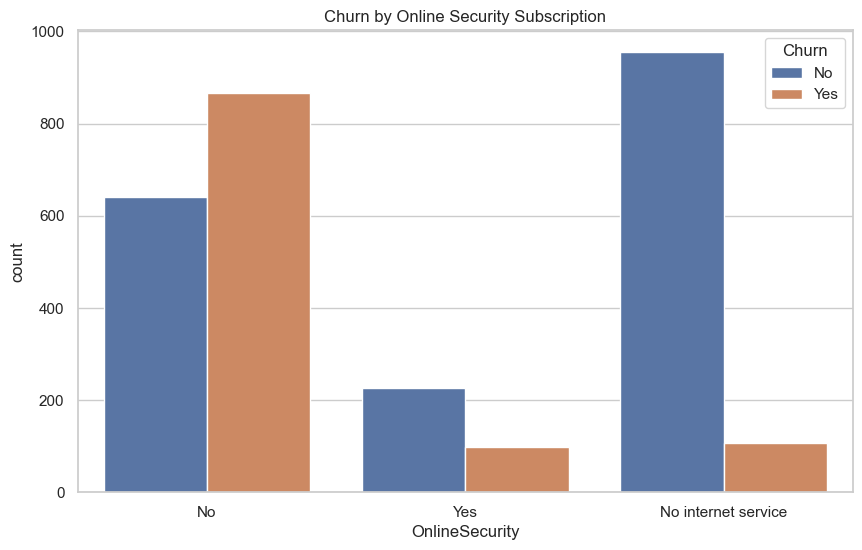

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.title("Churn by Online Security Subscription")
plt.show()

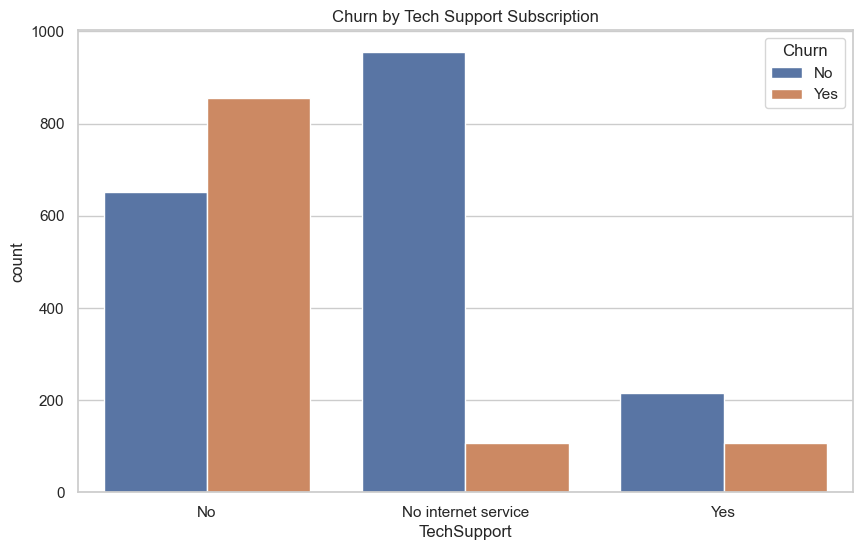

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title("Churn by Tech Support Subscription")
plt.show()

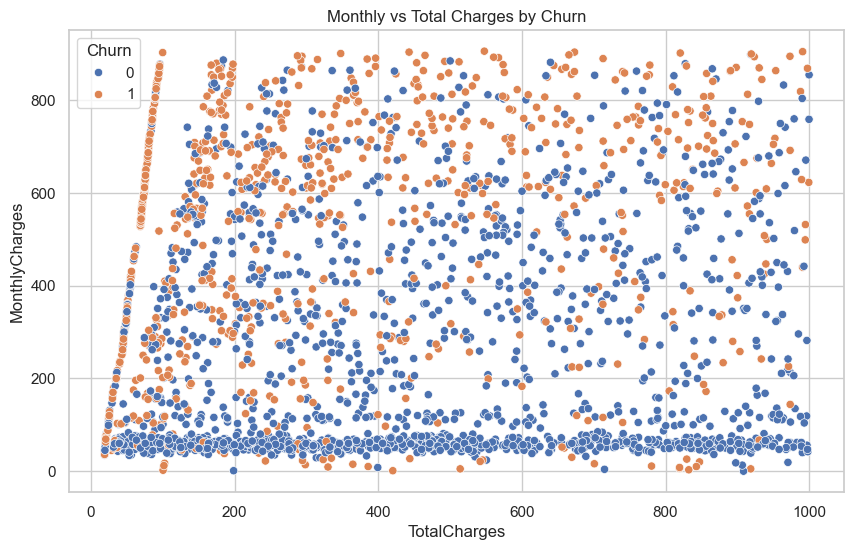

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalCharges', y='MonthlyCharges', hue='Churn', data=df)
plt.title("Monthly vs Total Charges by Churn")
plt.show()

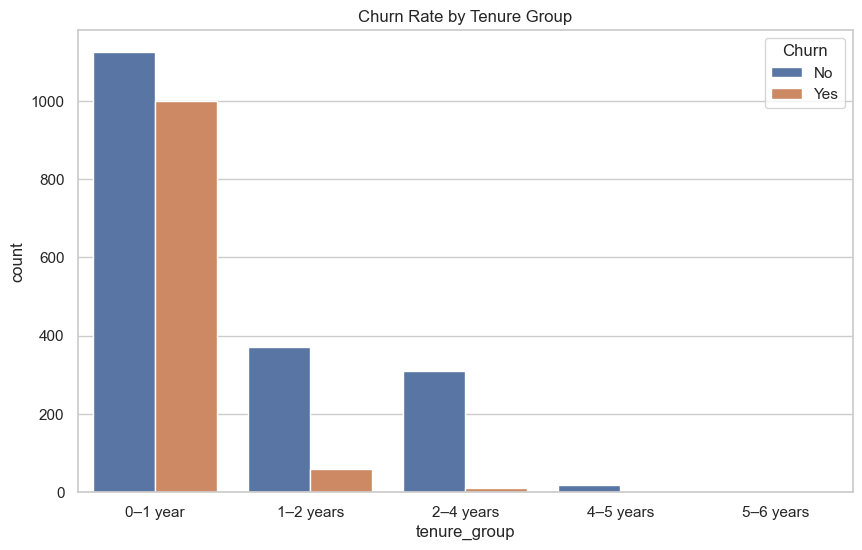

In [27]:
def tenure_group(tenure):
    if tenure <= 12:
        return '0–1 year'
    elif tenure <= 24:
        return '1–2 years'
    elif tenure <= 48:
        return '2–4 years'
    elif tenure <= 60:
        return '4–5 years'
    else:
        return '5–6 years'

df['tenure_group'] = df['tenure'].apply(tenure_group)

plt.figure(figsize=(10, 6))
sns.countplot(x='tenure_group', hue='Churn', data=df, order=['0–1 year', '1–2 years', '2–4 years', '4–5 years', '5–6 years'])
plt.title("Churn Rate by Tenure Group")
plt.show()

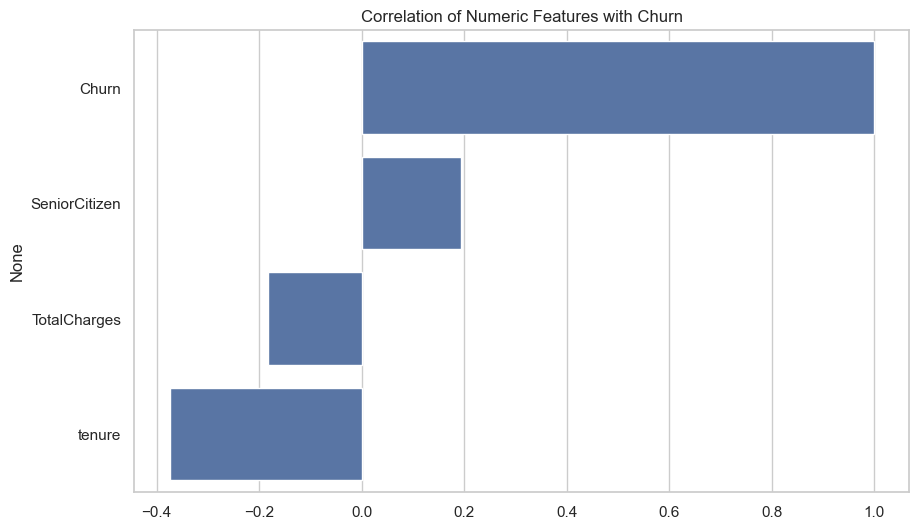

In [28]:
# Encode churn for correlation
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].apply(lambda x: 1 if x == 'Yes' or x == 1 else 0)

# Only numeric columns
corr = df_corr.select_dtypes(include=['int64', 'float64']).corr()['Churn'].sort_values(ascending=False)

# Barplot of top correlated features
plt.figure(figsize=(10, 6))
sns.barplot(x=corr.values, y=corr.index)
plt.title("Correlation of Numeric Features with Churn")
plt.show()

In [31]:
df = pd.read_csv("C:\\Users\\SNEHA\\OneDrive\\Desktop\\Outrix Internship\\Project 3\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Clean whitespace and symbols
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.replace('?', '', regex=False).str.strip()

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Drop customerID
df.drop('customerID', axis=1, inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [32]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [34]:
print("🔹 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

🔹 Logistic Regression Results
Accuracy: 0.7616580310880829
Confusion Matrix:
 [[291  64]
 [ 74 150]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       355
           1       0.70      0.67      0.68       224

    accuracy                           0.76       579
   macro avg       0.75      0.74      0.75       579
weighted avg       0.76      0.76      0.76       579

